# Import important Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.datasets import cifar10

# Load the Dataset and split 

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

# Data Preprocessing 

# Loading the cifar10 dataset 

In [3]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Checking the Data that what should it contain 

In [4]:
len(X_train)

50000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train[0].shape

(32, 32, 3)

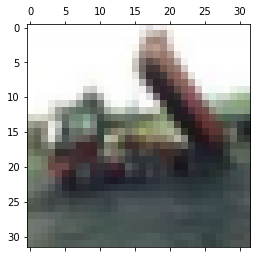

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

array([9], dtype=uint8)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
X_train.shape

(50000, 32, 32, 3)

# Definig a model 

In [13]:
model=tf.keras.models.Sequential()

# Adding the first convolutional layer 

In [14]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

# Adding the second convolutional layer 

In [15]:
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activat))

In [16]:
http://localhost:8888/notebooks/ai/Neural%20network/Hand%20Written%20Digit%20Classification%20waleed.ipynb#Adding-the-third-convolutional-layermodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

SyntaxError: invalid syntax (Temp/ipykernel_8196/428530814.py, line 1)

# Adding the third convolutional layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

# Adding flatten layer 

In [ ]:
model.add(tf.keras.layers.Flatten())

# Adding first fully connected layer

In [114]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Adding the output layer 

In [115]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))


In [116]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

# Compile the model

In [117]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["sparse_categorical_accuracy"])

## Training a model 

In [118]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 61ms/step - loss: 1.9969 - sparse_categorical_accuracy: 0.3998
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2930 - sparse_categorical_accuracy: 0.5427
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.1170 - sparse_categorical_accuracy: 0.6083
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9877 - sparse_categorical_accuracy: 0.6558
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8847 - sparse_categorical_accuracy: 0.6933


# Evaluating the model 

In [119]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.0729 - sparse_categorical_accuracy: 0.6369


In [120]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.636900007724762
